In [1]:
# io文件操作
import re
import os
import glob
import shutil

import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

## 0. ATI Mean和ATI standard文件重命名

In [2]:
ati_dir = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\ATI\\ORIGIN\\ATIGrid'
mean_dir = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\ATI\\ORIGIN\\ATIGridMEAN'
std_dir = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\ATI\\ORIGIN\\ATIGridSTD'
file_extension = '*.tif'

In [3]:
ati_out_dir = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\ATI\\TIFFONLY\\ATI'
mean_out_dir = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\ATI\\TIFFONLY\\ATIMEAN'
std_out_dir = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\ATI\\TIFFONLY\\ATISD'

# 使用 glob.glob() 函数获取符合条件的文件列表
ati_files = glob.glob(os.path.join(ati_dir, file_extension))
mean_files = glob.glob(os.path.join(mean_dir, file_extension))
std_files = glob.glob(os.path.join(std_dir, file_extension))

for i in range(len(ati_files)):
    # 获取文件名
    ati_filename = os.path.basename(ati_files[i])
    
    # 从文件名中提取日期信息
    date = re.findall(r'\d+', ati_filename)[0]
    
    # 构建输出文件路径
    ati_output = os.path.join(ati_out_dir, 'ATI{}'.format(date) + '.tif')
    mean_output = os.path.join(mean_out_dir, 'ATIMean{}'.format(date) + '.tif')
    std_output = os.path.join(std_out_dir, 'ATISD{}'.format(date) + '.tif')
    print(ati_output)
    print(mean_output)
    print(std_output)
    
#     # 复制文件到输出目录
#     shutil.copy(ati_files[i], ati_output)
#     shutil.copy(mean_files[i], mean_output)
#     shutil.copy(std_files[i], std_output)

D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\TIFFONLY\ATI\ATI2015091.tif
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\TIFFONLY\ATIMEAN\ATIMean2015091.tif
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\TIFFONLY\ATISD\ATISD2015091.tif
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\TIFFONLY\ATI\ATI2015092.tif
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\TIFFONLY\ATIMEAN\ATIMean2015092.tif
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\TIFFONLY\ATISD\ATISD2015092.tif
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\TIFFONLY\ATI\ATI2015093.tif
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\TIFFONLY\ATIMEAN\ATIMean2015093.tif
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\TIFFONLY\ATISD\ATISD2015093.tif
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\TIFFONLY\ATI\ATI201509

## 1. 查看ATI的缺失程度

In [4]:
input_dir = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\ATI\\TIFFONLY\\ATI'
file_extension = '*.tif'

In [5]:
# 使用 glob.glob() 函数获取符合条件的文件列表
files = glob.glob(os.path.join(input_dir, file_extension))

# 统计每个ATI中非NAN的栅格数量保存在一个字典变量中
nonnan_dict = {}

# 遍历文件列表
for file in files:
    
    # 使用 GDAL 库打开文件
    dataset = gdal.Open(file)
    
    # 遍历数据集中的每个栅格波段
    for i in range(dataset.RasterCount):
        
        # 获取当前波段
        band = dataset.GetRasterBand(i+1)
        
        # 将波段数据读入 NumPy 数组
        data = band.ReadAsArray()
        
        # 获取无数据值
        nodata_value = band.GetNoDataValue()
        # 将数据中的无数据值替换为np.nan
        data[data == nodata_value] = np.nan
        
        # 统计非NAN的栅格数量
        num_nonnan = np.count_nonzero(~np.isnan(data))
        nonnan_dict[file] = num_nonnan
        
#         # 展示有效数据
#         plt.imshow(data)
#         plt.show()
        
    # 关闭数据集
    dataset = None

In [6]:
# 按值排序并将其存储在列表中
sorted_list = sorted(nonnan_dict.items(), key=lambda x: x[1], reverse=True)

# 输出排序后的列表
filename_sorted_list = [(os.path.basename(x[0]), x[1]) for x in sorted_list]

## 2. 筛选有效ATI
### To be continue...

### 2.1 与有效SMAP的交集

In [7]:
smap_day_root = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\SMAP\\SMAP_DAY'
file_extension = "*.tif"

In [8]:
# 使用 glob.glob() 函数获取符合条件的文件列表
smap_files = glob.glob(os.path.join(smap_day_root, file_extension))

# 初始化一个空的日期列表
smap_date_list = []

# 遍历所有符合条件的文件
for file in smap_files:
    
    # 从文件路径中获取文件名
    filename = os.path.basename(file)
    
    # 使用正则表达式从文件名中提取日期信息，这里使用了 \d+ 匹配一个或多个数字
    # re.findall() 函数返回一个列表，如果文件名中有多个数字，则取第一个
    date = re.findall(r'\d+', filename)[0]
    
    # 将提取到的日期添加到日期列表中
    smap_date_list.append(date)

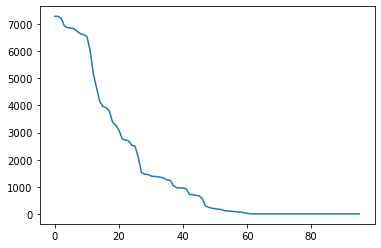

In [19]:
# 初始化一个空的有效ATI列表
valid_ati_list = []

# 遍历排序后的文件名列表
for x in filename_sorted_list:
    
    # 从文件名中提取日期信息
    date = re.findall(r'\d+', x[0])[0]
    
    # 如果日期在日期列表中，则将该文件添加到有效ATI列表中
    if date in smap_date_list:
        valid_ati_list.append(x)

x1 = []
x2 = []
for x in valid_ati_list:
    # 从文件名中提取日期信息
    date = re.findall(r'\d+', x[0])[0]
    x1.append(date.split('2015')[1])
    x2.append(x[1])

plt.plot(x2)